<a href="https://colab.research.google.com/github/dipsomask/workzone/blob/main/codeNetwork_1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ВВОД И НОРМИРОВАНИЕ ВСЕХ ДАННЫХ**

Импортируем все библиотеки, модули и базу данных:

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, Dropout,BatchNormalization
from keras.models import Sequential
from keras.datasets import mnist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Подгружаем базу данных:

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data() #подгружаем данные мниста

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
6


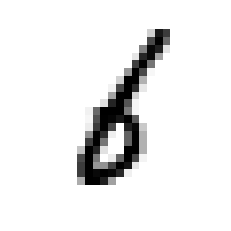

In [ ]:
#проверка изображений
print(xtrain.shape)
print(ytrain.shape)
plt.imshow(xtrain[256], cmap = 'binary')
plt.axis('off')
print(ytrain[256])

Меняем диапозон чисел с [0-255] на [0.0 - 1.0]:

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

Преобразуем в векторный формат:

In [ ]:
ytrain_convertedToVector = keras.utils.to_categorical(ytrain, 10)
ytest_convertedToVector = keras.utils.to_categorical(ytest, 10)

Проверяем:

In [ ]:
print(ytrain_convertedToVector[256])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# **МОДЕЛЬ НЕТВОРКА**

Инициализация модели и создание слоёв NW:

In [ ]:
model = keras.Sequential([
        Conv2D(28, kernel_size=(3, 3), input_shape=(28,28,1), activation='sigmoid'), #входной слой
        Conv2D(56, kernel_size=(3, 3), activation='sigmoid'),
        Conv2D(112, kernel_size=(3, 3), activation='sigmoid'),
        BatchNormalization(), #нормализуем для повышения вероятности успешного обучения
        Flatten(), #вытягиваем в вектор
        Dense(units=128, activation='sigmoid'), # Скрытый слой
        Dropout(0.2),
        Dense(units=10, activation='softmax')     # Выходной слой - 10 нейронов
    ])

# **КОМПИЛЯЦИЯ И ОБУЧЕНИЕ НЕТВОРКА**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain_convertedToVector, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 512s 340ms/step - loss: 0.3984 - accuracy: 0.8865 - val_loss: 2.6457 - val_accuracy: 0.3343
Epoch 2/10
1500/1500 [==============================] - 511s 341ms/step - loss: 0.3212 - accuracy: 0.9024 - val_loss: 0.3304 - val_accuracy: 0.9034
Epoch 3/10
1500/1500 [==============================] - 516s 344ms/step - loss: 0.2986 - accuracy: 0.9096 - val_loss: 1.9760 - val_accuracy: 0.4743
Epoch 4/10
1500/1500 [==============================] - 496s 331ms/step - loss: 0.2791 - accuracy: 0.9138 - val_loss: 0.5657 - val_accuracy: 0.8148
Epoch 5/10
1500/1500 [==============================] - 493s 329ms/step - loss: 0.2604 - accuracy: 0.9201 - val_loss: 0.2684 - val_accuracy: 0.9152
Epoch 6/10
1500/1500 [==============================] - 552s 368ms/step - loss: 0.2302 - accuracy: 0.9283 - val_loss: 0.5040 - val_accuracy: 0.8366
Epoch 7/10
1500/1500 [==============================] - 516s 344ms/step - loss: 0.2187 - accuracy: 0.9321 - val_

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebook/modelV1_0_0')

# **ТЕСТОВЫЙ ЗАПУСК**

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


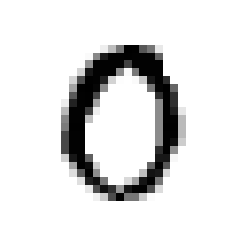

In [ ]:
#проверка изображений
k = 13
plt.imshow(xtest[k], cmap='binary')
plt.axis('off')
print(ytest_convertedToVector[k])